**Importing Libraries and Defining Hyperparameters & Visualization Function**

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Create a n*n grid (n^2 sectors)
grid_size = (10, 10)

# number of flags and initial heat value for flags
num_flags = 4
flag_value = 1

In [2]:
def vis():
  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))

  # Plot the flag array on the first subplot
  axes[0].imshow(flag_array, interpolation='nearest')
  axes[0].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[0].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[0].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[0].invert_yaxis()
  axes[0].set_title(f'Flag Placement for {num_flags} Flags ({grid_size} Grid)')

  # Plot the heatmap on the second subplot
  heatmap_plot = axes[1].imshow(heatmap, cmap='hot', interpolation='bicubic')
  axes[1].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[1].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[1].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[1].invert_yaxis()
  axes[1].set_title('Gaussian Spread Heatmap')

  # Add color bar to the heatmap
  plt.colorbar(heatmap_plot, ax=axes[1], label='Heatmap Values (Gaussian Distribution)')

  # Display the plots
  plt.tight_layout()
  plt.show()

# Random Flag locations & Gaussian Heatmap Visualizations - 2D & 3D

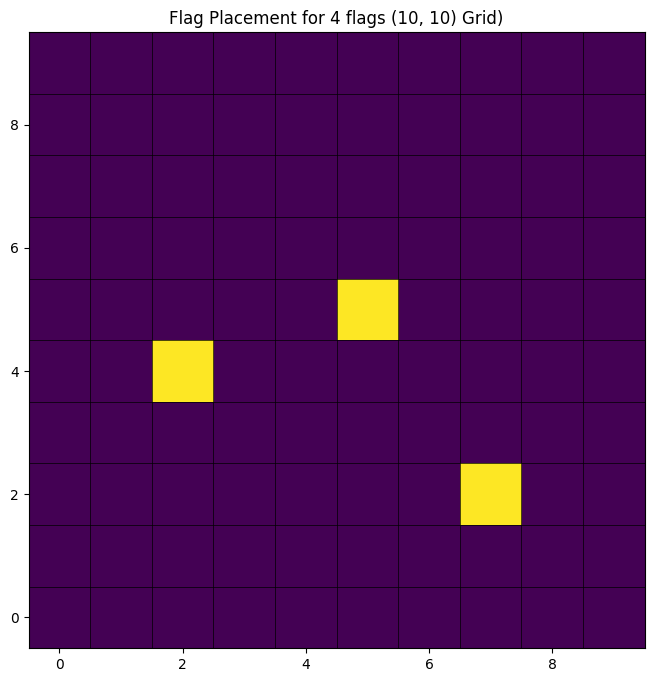

In [62]:
# Create an empty flag array (initialized to 0)
flag_array = np.zeros(grid_size)

# Randomly select 500 unique locations to place the flags (value 1 represents a flag)
# flag_positions = np.random.choice(np.arange(grid_size[0]*grid_size[1]), num_flags, replace=False)
flag_positions = np.array([42, 55, 27])
# Assign flags to the selected positions
for pos in flag_positions:
    row = pos // grid_size[0]  # Get the row index
    col = pos % grid_size[1]   # Get the column index
    flag_array[row, col] = flag_value

# Visualize the flag placement (showing flag locations in white on a black background)
plt.figure(figsize=(8, 8))
plt.imshow(flag_array, interpolation='nearest')

# Add gridlines (visible sector boundaries)
ax = plt.gca()  # Get current axis
ax.set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)  # Set x ticks for gridlines
ax.set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)  # Set y ticks for gridlines
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)  # Add gridlines
ax.tick_params(which='minor', size=0)  # Hide minor tick marks
ax.invert_yaxis()

plt.title(f'Flag Placement for {num_flags} flags {grid_size} Grid)')
plt.show()

In [63]:
print(flag_positions)
for pos in flag_positions:
    row = pos // grid_size[0]  # Get the row index
    col = pos % grid_size[1]   # Get the column index
    print(row,col)

[42 55 27]
4 2
5 5
2 7


min-heat-val 0.3352069275355477 max-heat-val 1.0


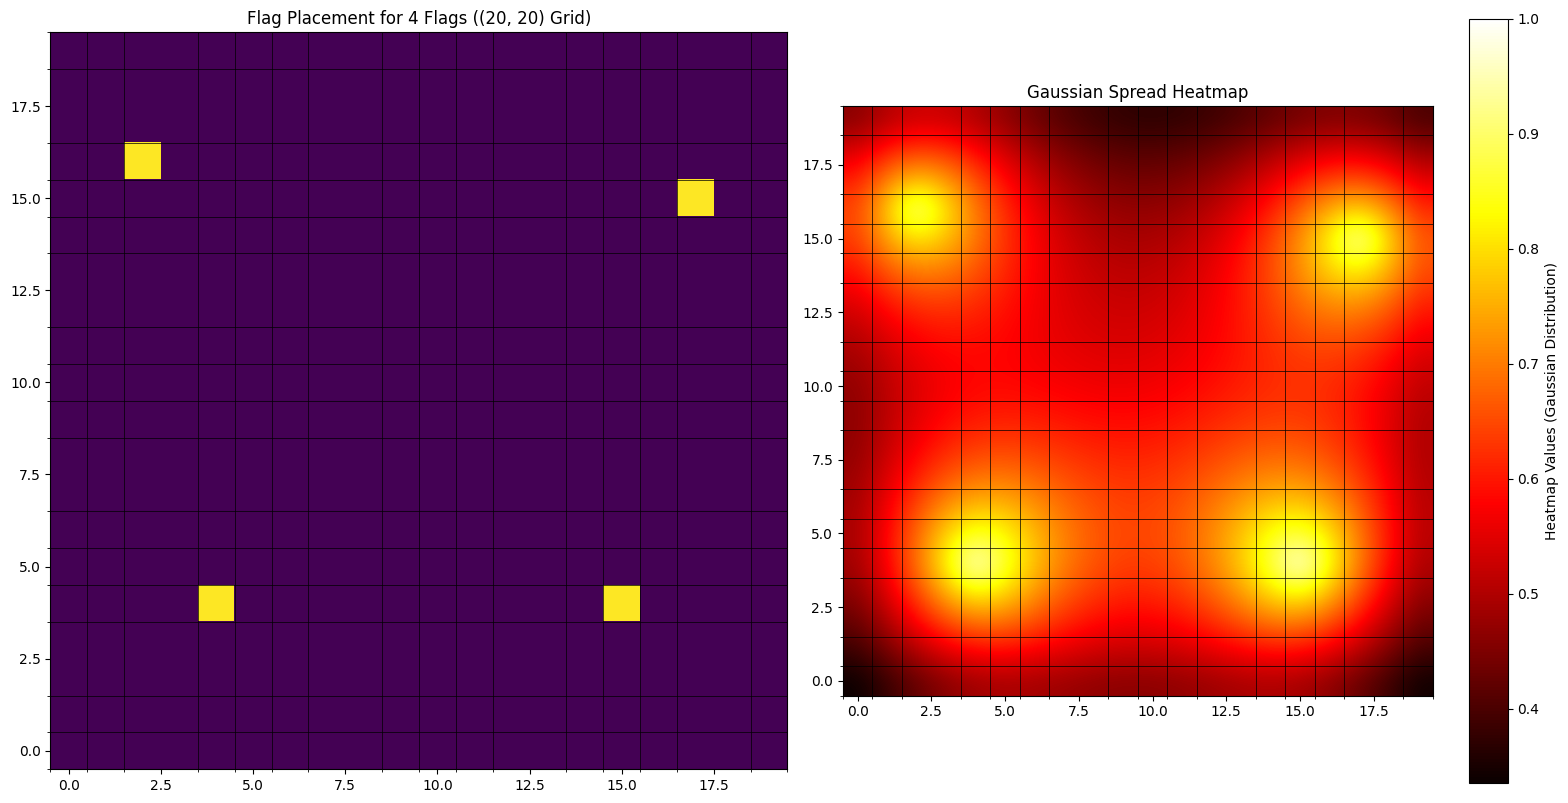

In [5]:
def create_flag_heatmap(flag_array, size=grid_size, peak_value=1.0, spread=5.0):
    heatmap = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            if flag_array[i, j] == flag_value:  # Check if there is a flag at this location
                # Create Gaussian-like heat spread around the flag
                for x in range(size[0]):
                    for y in range(size[1]):
                        distance = np.sqrt((x - i) ** 2 + (y - j) ** 2)
                        heatmap[x, y] += peak_value * np.exp(-distance / spread)  # Accumulate heat values
    return heatmap

heatmap = create_flag_heatmap(flag_array)
# Normalize the heatmap to range [0, 1]
heatmap = heatmap / np.max(heatmap)
print("min-heat-val",np.min(heatmap),"max-heat-val",np.max(heatmap))
vis()

In [ ]:
# Assuming heatmap is already defined and contains the heat values

from mpl_toolkits.mplot3d import Axes3D

# Create grid coordinates for the x and y axes
x = np.arange(heatmap.shape[1])  # 100 for x-axis
y = np.arange(heatmap.shape[0])  # 100 for y-axis
x, y = np.meshgrid(x, y)  # Create a meshgrid for the 2D plane

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# Use x, y for the base, and heatmap for the height
ax.plot_surface(x, y, heatmap, cmap='hot', edgecolor='none')

# Set labels
ax.set_xlabel('X Axis (Sectors)')
ax.set_ylabel('Y Axis (Sectors)')
ax.set_zlabel('Heat Value')

# Set title
ax.set_title(f'3D Heatmap with {num_flags} Flags')

# Add color bar
mappable = plt.cm.ScalarMappable(cmap='hot')
mappable.set_array(heatmap)
plt.colorbar(mappable, label='Heat Values')

# Show the plot
plt.show()

# Saving and Loading Heatmap

In [56]:
# np.save('heatmap.npy', heatmap)
# print("Heatmap saved to file 'heatmap.npy'")
loaded_heatmap = np.load('heatmap (3).npy')
heatmap = loaded_heatmap


In [27]:
from geopy.distance import distance
import numpy as np

def move_gps(lat, lon, meters, dir):
    # Define the starting point
    start_point = (lat, lon)
    # Calculate the new point after moving forward by 'meters'
    new_point = distance(meters=meters).destination(start_point, dir)
    return [new_point.latitude, new_point.longitude]

def displacement_components(old_lat, old_lon, new_lat, new_lon):
    # Earth radius in meters
    R = 6371000  # Earth's radius in meters

    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(old_lat)
    lat2_rad = np.radians(new_lat)
    delta_lat = np.radians(new_lat - old_lat)
    delta_lon = np.radians(new_lon - old_lon)

    # Calculate the displacement in Y (North-South)
    y = delta_lat * R

    # Calculate the displacement in X (East-West)
    x = delta_lon * R * np.cos(lat1_rad)  # Multiply by cos(latitude) to account for the Earth's curvature

    return x, y

# Example usage
old_lat = 40.7128
old_lon = -74.0060
meters = 100  # Example displacement

# Move the GPS
new_coordinates = move_gps(old_lat, old_lon, meters, 90) #100m South
new_coordinates = move_gps(new_coordinates[0], new_coordinates[1], meters/2, 180) #100m West

# Calculate displacement components
x_component, y_component = displacement_components(old_lat, old_lon, new_coordinates[0], new_coordinates[1])

print(f"New Coordinates: {new_coordinates}")
print(f"Displacement X: {x_component:.2f} m, Displacement Y: {y_component:.2f} m")

New Coordinates: [40.712349739633524, -74.00481655863739]
Displacement X: 99.75 m, Displacement Y: -50.07 m


In [28]:
import numpy as np

# Example values of x_disp
x_disp = np.array([-1.5, -0.4, 50.6, 100.0, 99.7, -100.3])  # Example input

# Function to process x_disp
def process_x_disp(x_disp):
    # Take the absolute value
    abs_x_disp = np.abs(x_disp)

    # Round to nearest integer
    rounded_x_disp = np.round(abs_x_disp).astype(int)

    # Handle specific cases
    rounded_x_disp[rounded_x_disp == -1] = 0  # if -1, set to 0
    rounded_x_disp[rounded_x_disp == 100] = 99  # if 100, set to 99

    return rounded_x_disp

# Process the x_disp array
result = process_x_disp(x_disp)

print("Processed x_disp values:", result)

Processed x_disp values: [ 2  0 51 99 99 99]


# Visualize loaded heatmap

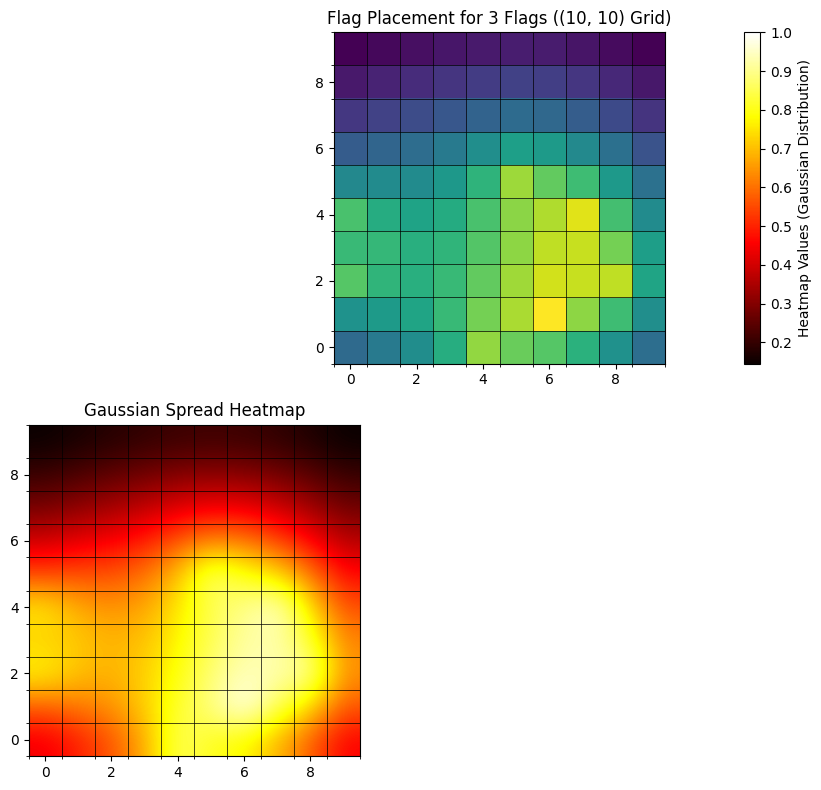

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def vis(heatmap, grid_size):
  # Create subplots
  fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#   # Plot the flag array on the first subplot
  axes[0].imshow(heatmap, interpolation='nearest')
  axes[0].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[0].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[0].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[0].invert_yaxis()
  axes[0].set_title(f'Flag Placement for {3} Flags ({grid_size} Grid)')

  # Plot the heatmap on the second subplot
  heatmap_plot = axes[1].imshow(heatmap, cmap='hot', interpolation='bicubic')
  axes[1].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[1].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[1].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[1].invert_yaxis()
  axes[1].set_title('Gaussian Spread Heatmap')

  # Add color bar to the heatmap
  plt.colorbar(heatmap_plot, ax=axes[0], label='Heatmap Values (Gaussian Distribution)')

  # Display the plots
  plt.tight_layout()
  plt.show()

grid_size = (10, 10)
loaded_heatmap = np.load('heatmap.npy')
vis(loaded_heatmap, grid_size)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
heatmap = loaded_heatmap
# Create grid coordinates for the x and y axes
x = np.arange(heatmap.shape[1])  # 100 for x-axis
y = np.arange(heatmap.shape[0])  # 100 for y-axis
x, y = np.meshgrid(x, y)  # Create a meshgrid for the 2D plane

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# Use x, y for the base, and heatmap for the height
ax.plot_surface(x, y, heatmap, cmap='hot', edgecolor='none')

# Set labels
ax.set_xlabel('X Axis (Sectors)')
ax.set_ylabel('Y Axis (Sectors)')
ax.set_zlabel('Heat Value')

# Set title
ax.set_title(f'3D Heatmap with some Flags')

# Add color bar
mappable = plt.cm.ScalarMappable(cmap='hot')
mappable.set_array(heatmap)
plt.colorbar(mappable, label='Heat Values')

# Show the plot
plt.show()

## AND FINALLAY

In [77]:
def ValidMove(drone_pos, drones,drone_index):

    low_dist = 99999
    for j, other_drone_pos in enumerate(drones):
        if j != drone_index:
            ox, oy = int(other_drone_pos[0]), int(other_drone_pos[1])
            dist = np.sqrt((ox - drone_pos[0])**2 + (oy - drone_pos[1])**2)
            if dist < low_dist:
                low_dist = dist
    if low_dist > 1:
        return True
    else:
        return False

In [66]:
def is_covered_by_others(nx, ny, drones, drone_index):
    for j, other_drone_pos in enumerate(drones):
        if j != drone_index:  
            ox, oy = int(other_drone_pos[0]), int(other_drone_pos[1])
            if abs(ox - nx) <= 1 and abs(oy - ny) <= 1:
                return True  
    return False  

def calculate_drone_utility(drone_pos, drones, heatmap, drone_index):
    covered_cells = []
    grid_size = heatmap.shape
    dx, dy = drone_pos
    for nx in range(max(0, dx - 1), min(grid_size[0], dx + 2)): ## check row wisee
        for ny in range(max(0, dy - 1), min(grid_size[1], dy + 2)): ## check col wise
            if not is_covered_by_others(nx, ny, drones, drone_index):  
                covered_cells.append((nx, ny))  ## unique ones
    utility = sum(heatmap[nx, ny] for nx, ny in covered_cells)
    return utility

In [67]:
def evaluate_movement_random(drone_pos, drones, heatmap, drone_index):
    best_utility = calculate_drone_utility(drone_pos, drones, heatmap, drone_index)
    best_move = drone_pos  
    dx = np.random.choice([-1, 0, 1])
    dy = np.random.choice([-1, 0, 1])
    new_x = drone_pos[0] + dx
    new_y = drone_pos[1] + dy
    if 0 <= new_x < heatmap.shape[0] and 0 <= new_y < heatmap.shape[1]:
        new_pos = (new_x, new_y)
        new_utility = calculate_drone_utility(new_pos, drones, heatmap, drone_index)
        if new_utility > best_utility:
            best_utility = new_utility
            best_move = new_pos
    return best_move, best_utility

In [68]:
def remove_flag_from_heatmap(heatmap, flag_pos, peak_value=1.0, spread=2.0):
    i, j = flag_pos
    for x in range(heatmap.shape[0]):
        for y in range(heatmap.shape[1]):
            distance = np.sqrt((x - i) ** 2 + (y - j) ** 2)
            heatmap[x, y] -= peak_value * np.exp(-distance / spread)
    heatmap[heatmap < 0] = 0 
    return heatmap

In [69]:
def vis_drones(heatmap, drones, utilities, paths, grid_size=(10, 10)):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the heatmap
    heatmap_plot = ax.imshow(heatmap, cmap='hot', interpolation='bicubic')
    ax.set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.invert_yaxis()  # Invert y-axis to match the grid coordinates
    
    # Plot each drone's path and current position with its utility
    for idx, drone_path in enumerate(paths):
        # Convert path to numpy array for indexing
        drone_path = np.array(drone_path)
        
        # Plot the path
        ax.plot(drone_path[:, 1], drone_path[:, 0], 'g-', linewidth=1, label=f'Drone {idx + 1} Path')

        # Plot the current position
        current_pos = drone_path[-1]  # Last position in the path
        print(current_pos)
        print(utilities[idx])
        ax.plot(current_pos[1], current_pos[0], 'bo', markersize=5, label=f'Drone {idx + 1} (Utility: {utilities[idx]:.2f})')

    plt.colorbar(heatmap_plot, ax=ax, label='Heatmap Value')
    plt.title('Drone Coverage and Utility Visualization with Paths')
    # plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


In [70]:
def move(drones, current_heatmap,poped,flags,paths,spare_drones2,spare_drones,p=0.1):

    random_number = np.random.rand()
    if len(poped)==len(drones):
        return None
    
    idx = np.random.choice(range(len(drones)))
    drone_pos = drones[idx]     

    while idx in poped:
        idx = np.random.choice(range(len(drones)))
        drone_pos = drones[idx]
    

    if random_number > p:
        best_move, _ = evaluate_movement_random(drone_pos, drones, current_heatmap, idx)
        
        drones[idx] = best_move  
        paths[idx].append(drones[idx])  

        if drones[idx] in flags:        
            print(f"Drone at {drones[idx]} reached a flag.")
            # current_heatmap = remove_flag_from_heatmap(current_heatmap, drones[idx])
            flags.remove(drones[idx])
            paths[idx].append(drones[idx])  
            spare_drones2.append(drones[idx])  
            spare_drones[idx]=drones[idx]   
            poped.append(idx)

            return paths,flags,spare_drones2,spare_drones,current_heatmap
    else:
        moves = [-1,0,1]
        new_x = drones[idx][0] + np.random.choice(moves)
        new_y = drones[idx][1] + np.random.choice(moves)

        # while new_x < 0 or new_x >= 20 or new_y < 0 or new_y >= 20:
        #     new_x = drones[idx][0] + np.random.choice(moves)
        #     new_y = drones[idx][1] + np.random.choice(moves) 

        valid = ValidMove(drone_pos, drones, idx)
        count = 0
        while (new_x < 0 or new_x >= 10 or new_y < 0 or new_y >= 10) and valid:
            new_x = drones[idx][0] + np.random.choice(moves)
            new_y = drones[idx][1] + np.random.choice(moves)
            drone_pos = (new_x, new_y)
            valid = ValidMove(drone_pos, drones,idx)
            count += 1
            # waits for max 15 iters (it may be the case that all possible movements are resulting in collision --- in that case don't MOVE)
            if count == 15:
                # if valid:
                drones[idx] = (new_x, new_y)
                paths[idx].append(drones[idx])
                    # paths[idx].append(drones[idx])
                return paths, flags, spare_drones2, spare_drones, current_heatmap

        drones[idx] = (new_x, new_y)
        paths[idx].append(drones[idx])
        
        if drones[idx] in flags:
            print(f"Drone at {drones[idx]} reached a flag.")
            # current_heatmap = remove_flag_from_heatmap(current_heatmap, drones[idx])
            flags.remove(drones[idx])
            
            paths[idx].append(drones[idx])  
            spare_drones2.append(drones[idx])  
            spare_drones[idx]=drones[idx] 
            poped.append(idx)  
            return paths,flags,spare_drones2,spare_drones,current_heatmap


[(4, 2), (5, 5), (2, 7)]
Drone at (2, 7) reached a flag.
Drone at (4, 2) reached a flag.
Drone at (5, 5) reached a flag.
Done after  201  iterations.
[4 2]
8.047020442064596
[2 7]
5.803808037341223
[5 5]
6.679675865360915


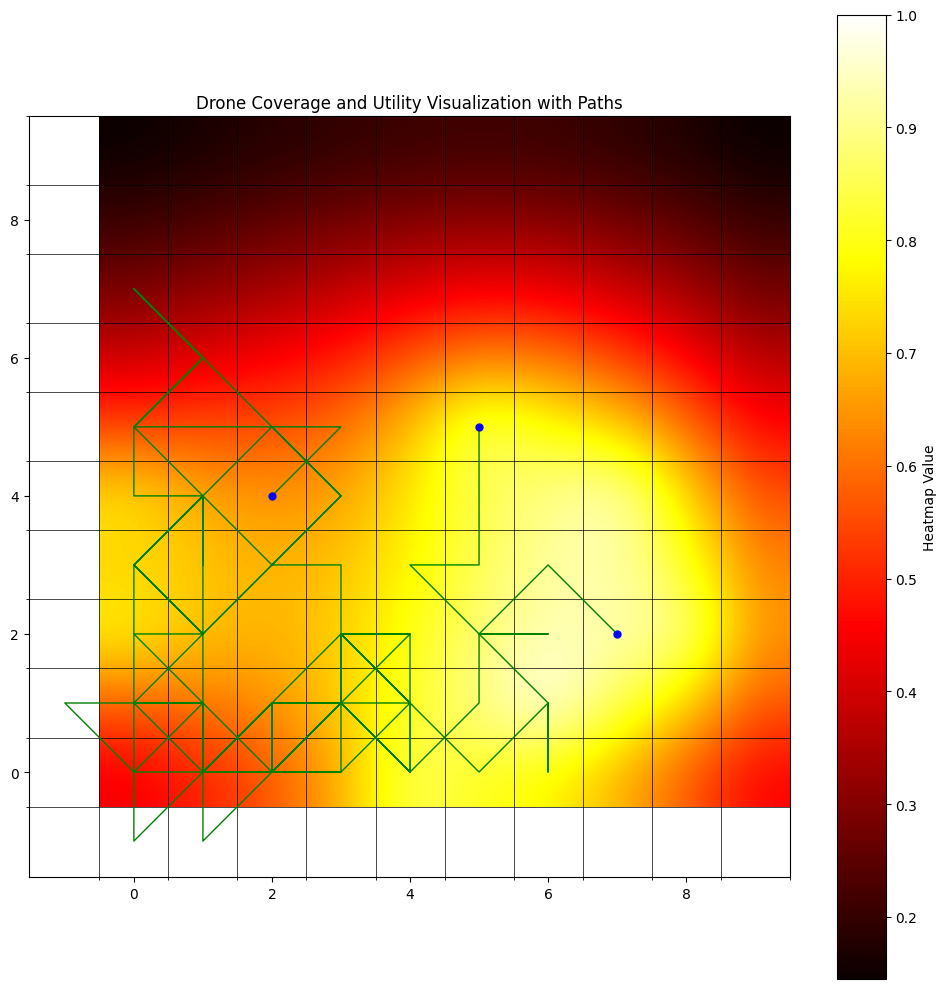

In [80]:
drones = [(1, 0), (0, 1), (0,0)]  
spare_drones = drones.copy()
spare_drones2 =[]
flags = [(pos // 10, pos % 10) for pos in flag_positions] 


print(flags)
paths = [[drone_pos] for drone_pos in drones]
current_heatmap = np.copy(loaded_heatmap)
poped = []
num_iterations = 20000
p=0.4 ## probabilty of random movement

## HERE THE ITERATION IS THE TOTAL ITERATION IN WHICH YOLO IS TO BE INCLUDED
## TO SHOW THAT IT MOVES ONCE AND RETURNS TO LET OTHER THINGS BE PRINTED positions of drones
for iteration in range(num_iterations):
    try:
        paths,flags,spare_drones2,spare_drones,current_heatmap = move(drones, current_heatmap,poped,flags,paths,spare_drones2,spare_drones,p)
    except:
        if len(poped)==len(drones):
            print("Done after ",iteration," iterations.")
            break


    # if iteration % 500 == 1:
    #     print("Drone positions after", iteration, "iterations:")
    #     print(drones)

# print(len(paths))



utilities = [calculate_drone_utility(drone_pos, spare_drones2, loaded_heatmap, idx) for idx, drone_pos in enumerate(spare_drones2)]

# print(len(utilities))
# print(utilities)

# print(len(spare_drones2))

vis_drones(loaded_heatmap, spare_drones2, utilities, paths)